[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/atmos-cloud-sim-uj/PySDM-examples.git/main?urlpath=PySDM_examples/deJong_Mackay_2022/rainshaft_1D.ipynb)
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/atmos-cloud-sim-uj/PySDM-examples/blob/main/PySDM_examples/deJong_Mackay_2022/rainshaft_1D.ipynb)

#### based on Fig. 1 from Shipway & Hill 2012 (Q. J. Royal Meteo. Soc. 138)  "_Diagnosis of systematic differences between multiple parametrizations of warm rain microphysics using a kinematic framework_"   
https://doi.org/10.1002/qj.1913

Including BREAKUP process to demonstrate physical changes to cloud.

In [2]:
from PySDM_examples.deJong_Mackay_2022 import Settings1D, Simulation1D, plot1D
from PySDM.dynamics.collisions.coalescence_efficiencies import ConstEc
from PySDM.dynamics.collisions.breakup_efficiencies import ConstEb
from PySDM.dynamics.collisions.breakup_fragmentations import Gaussian
from PySDM.physics import si
import numpy as np

## WITHOUT BREAKUP

In [3]:
# WITHOUT BREAKUP
n_sd_per_gridbox = 256
dt = 20*si.s
dz = 100*si.m

output = {}
rho_times_w = 3*si.m/si.s
precip = True
breakup = False
key = f"rhow={rho_times_w}_p={precip}_b={breakup}"
output[key] = Simulation1D(Settings1D(n_sd_per_gridbox=n_sd_per_gridbox, 
    rho_times_w_1=rho_times_w, dt=dt, dz=dz, precip=precip, breakup=breakup)).run().products

### Hydrometeors

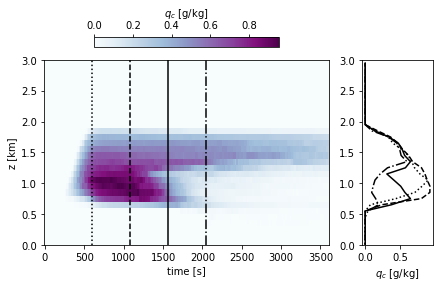

HTML(value="<a href='./figures_qc_rhow=3.0_p=True_b=False.pdf' target='_blank'>./figures_qc_rhow=3.0_p=True_b=…

In [4]:
breakup = False
key = f"rhow={rho_times_w}_p={precip}_b={breakup}"
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='qc', qlabel='$q_c$ [g/kg]', fname=f'figures_qc_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line,cmax=1.25)

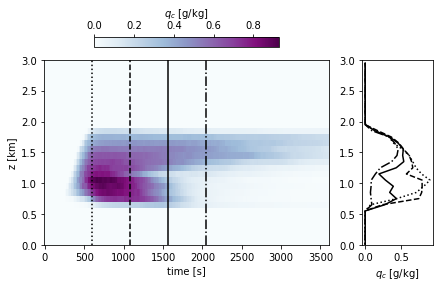

HTML(value="<a href='./figures_qcigel_rhow=3.0_p=True_b=False.pdf' target='_blank'>./figures_qcigel_rhow=3.0_p…

In [5]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='qc_igel', qlabel='$q_c$ [g/kg]', fname=f'figures_qcigel_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line,cmax=1.25)

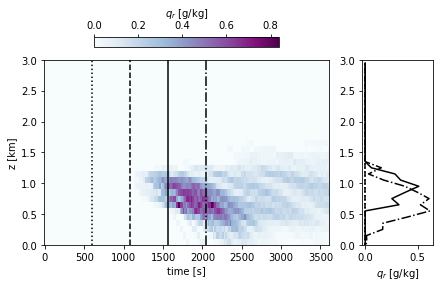

HTML(value="<a href='./figures_qr_rhow=3.0_p=True_b=False.pdf' target='_blank'>./figures_qr_rhow=3.0_p=True_b=…

In [6]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='qr', qlabel='$q_r$ [g/kg]', fname=f'figures_qr_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line,cmax=1.25)

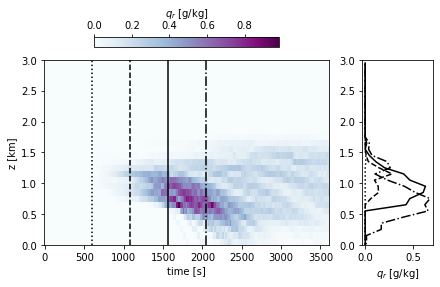

HTML(value="<a href='./figures_qrigel_rhow=3.0_p=True_b=False.pdf' target='_blank'>./figures_qrigel_rhow=3.0_p…

In [7]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='qr_igel', qlabel='$q_r$ [g/kg]', fname=f'figures_qrigel_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line,cmax=1.25)

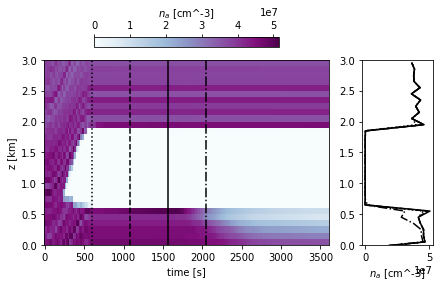

HTML(value="<a href='./figures_na_rhow=3.0_p=True_b=False.pdf' target='_blank'>./figures_na_rhow=3.0_p=True_b=…

In [8]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='na', qlabel='$n_a$ [cm^-3]', fname=f'figures_na_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line,cmax=75)

### Aerosol Rates

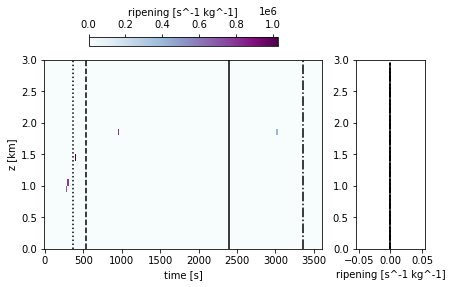

HTML(value="<a href='./figures_ripening_rhow=3.0_p=True_b=False.pdf' target='_blank'>./figures_ripening_rhow=3…

In [9]:
breakup = False
key = f"rhow={rho_times_w}_p={precip}_b={breakup}"
line={6: ':', 9: '--', 40: '-', 56: '-.'}
plot1D(var='ripening', qlabel='ripening [s^-1 kg^-1]', fname=f'figures_ripening_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line, cmax=5e5)

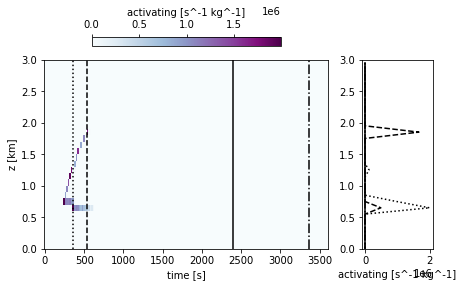

HTML(value="<a href='./figures_activating_rhow=3.0_p=True_b=False.pdf' target='_blank'>./figures_activating_rh…

In [10]:
key = f"rhow={rho_times_w}_p={precip}_b={breakup}"
line={6: ':', 9: '--', 40: '-', 56: '-.'}
plot1D(var='activating', qlabel='activating [s^-1 kg^-1]', fname=f'figures_activating_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line, cmax=2e6)

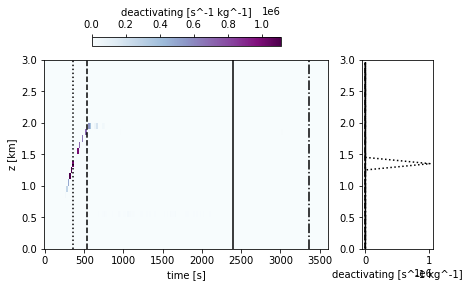

HTML(value="<a href='./figures_deactivating_rhow=3.0_p=True_b=False.pdf' target='_blank'>./figures_deactivatin…

In [11]:
line={6: ':', 9: '--', 40: '-', 56: '-.'}
plot1D(var='deactivating', qlabel='deactivating [s^-1 kg^-1]', fname=f'figures_deactivating_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line, cmax=1.25e6)

### Collision rates

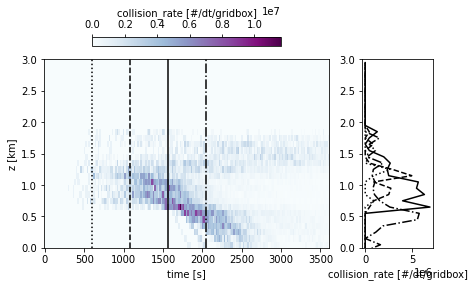

HTML(value="<a href='./figures_collision_rate=3_p=True__b=False.pdf' target='_blank'>./figures_collision_rate=…

In [12]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
breakup = False
plot1D(var='collision_rate', qlabel='collision_rate [#/dt/gridbox]', fname=f'figures_collision_rate={int(rho_times_w)}_p={precip}__b={breakup}.pdf', 
    output=output[f'rhow={int(rho_times_w)}.0_p={precip}_b={breakup}'],vmin=0.0,vmax=20.0,line=line)

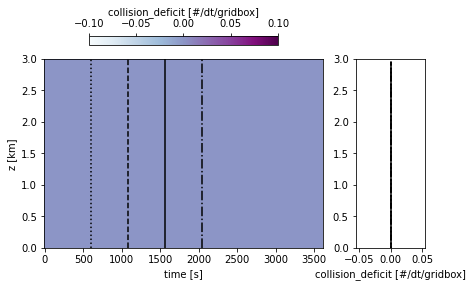

HTML(value="<a href='./figures_collision_deficit=3_p=True__b=False.pdf' target='_blank'>./figures_collision_de…

In [13]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
breakup = False
plot1D(var='collision_deficit', qlabel='collision_deficit [#/dt/gridbox]', fname=f'figures_collision_deficit={int(rho_times_w)}_p={precip}__b={breakup}.pdf', 
    output=output[f'rhow={int(rho_times_w)}.0_p={precip}_b={breakup}'],vmin=0.0,vmax=20.0,line=line,cmax=1e7)

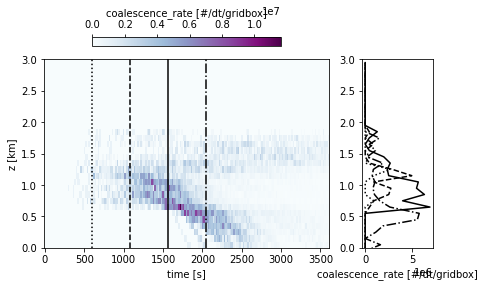

HTML(value="<a href='./figures_coalescence_rate=3_p=True__b=False.pdf' target='_blank'>./figures_coalescence_r…

In [14]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
breakup = False
plot1D(var='coalescence_rate', qlabel='coalescence_rate [#/dt/gridbox]', fname=f'figures_coalescence_rate={int(rho_times_w)}_p={precip}__b={breakup}.pdf', 
    output=output[f'rhow={int(rho_times_w)}.0_p={precip}_b={breakup}'],vmin=0.0,vmax=20.0,line=line,cmax=1e7)

## WITH Semi-Deterministic BREAKUP

In [15]:
# WITH BREAKUP
n_sd_per_gridbox = 256
dt = 20*si.s
dz = 100*si.m

frag_scale_r = 30*si.um
frag_scale_v = frag_scale_r**3*4/3*np.pi

rho_times_w = 3*si.m/si.s
precip = True
breakup = True
key = f"rhow={rho_times_w}_p={precip}_b={breakup}"
settings = Settings1D(n_sd_per_gridbox=n_sd_per_gridbox, rho_times_w_1=rho_times_w, 
    dt=dt, dz=dz, precip=precip, breakup=breakup)
settings.coalescence_efficiency=ConstEc(Ec=0.95)
settings.breakup_efficiency=ConstEb(Eb=1.0)
settings.fragmentation_function=Gaussian(mu=frag_scale_v, sigma=frag_scale_v/2.5, vmin=(1*si.um)**3, nfmax=10)
settings.warn_breakup_overflow=False
other_label= ""
output[key] = Simulation1D(settings).run().products


### Hydrometeors

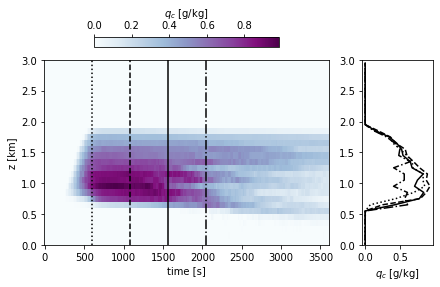

HTML(value="<a href='./figures_qc_rhow=3.0_p=True_b=True.pdf' target='_blank'>./figures_qc_rhow=3.0_p=True_b=T…

In [16]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='qc', qlabel='$q_c$ [g/kg]', fname=f'figures_qc_{key}{other_label}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line,cmax=1.25)

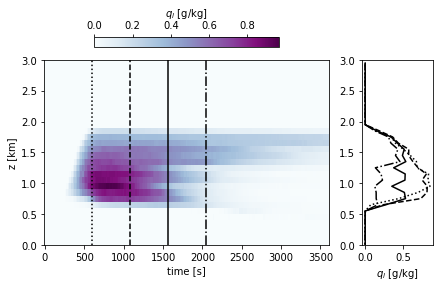

HTML(value="<a href='./figures_qcigel_rhow=3.0_p=True_b=True.pdf' target='_blank'>./figures_qcigel_rhow=3.0_p=…

In [17]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='qc_igel', qlabel='$q_l$ [g/kg]', fname=f'figures_qcigel_{key}{other_label}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line,cmax=1.25)

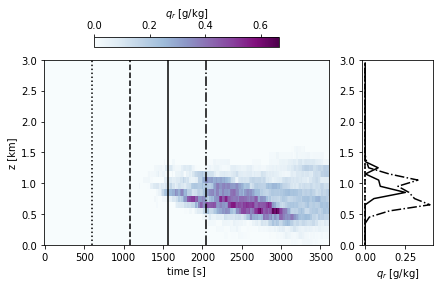

HTML(value="<a href='./figures_qr_rhow=3.0_p=True_b=True.pdf' target='_blank'>./figures_qr_rhow=3.0_p=True_b=T…

In [18]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='qr', qlabel='$q_r$ [g/kg]', fname=f'figures_qr_{key}{other_label}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line,cmax=1.25)

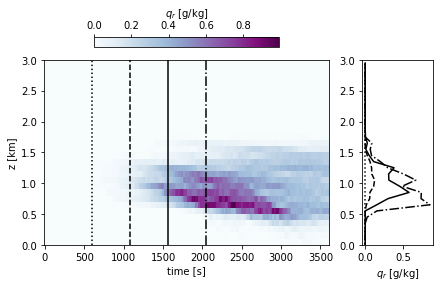

HTML(value="<a href='./figures_qrigel_rhow=3.0_p=True_b=True.pdf' target='_blank'>./figures_qrigel_rhow=3.0_p=…

In [19]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='qr_igel', qlabel='$q_r$ [g/kg]', fname=f'figures_qrigel_{key}{other_label}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line,cmax=1.25)

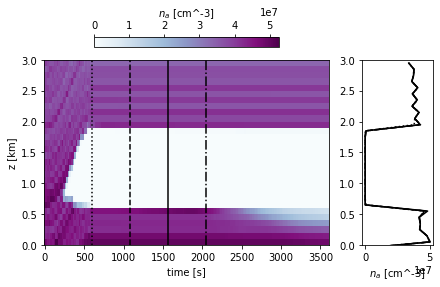

HTML(value="<a href='./figures_na_rhow=3.0_p=True_b=True.pdf' target='_blank'>./figures_na_rhow=3.0_p=True_b=T…

In [20]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
breakup=True
plot1D(var='na', qlabel='$n_a$ [cm^-3]', fname=f'figures_na_{key}{other_label}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line,cmax=75)

### Aerosol rates

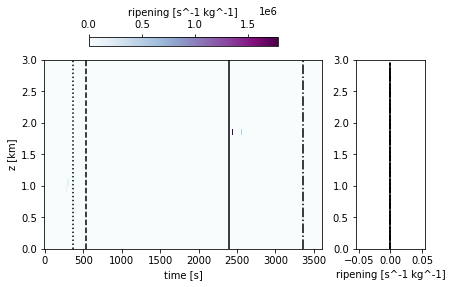

HTML(value="<a href='./figures_ripening_rhow=3.0_p=True_b=True.pdf' target='_blank'>./figures_ripening_rhow=3.…

In [21]:
line={6: ':', 9: '--', 40: '-', 56: '-.'}
plot1D(var='ripening', qlabel='ripening [s^-1 kg^-1]', fname=f'figures_ripening_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line, cmax=5e5)

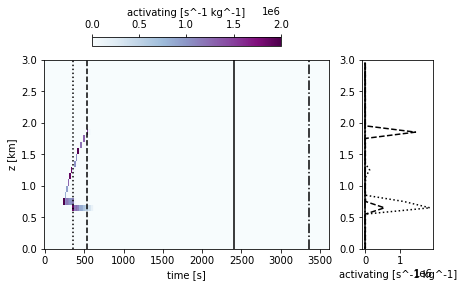

HTML(value="<a href='./figures_activating_rhow=3.0_p=True_b=True.pdf' target='_blank'>./figures_activating_rho…

In [22]:
line={6: ':', 9: '--', 40: '-', 56: '-.'}
plot1D(var='activating', qlabel='activating [s^-1 kg^-1]', fname=f'figures_activating_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line, cmax=2e6)

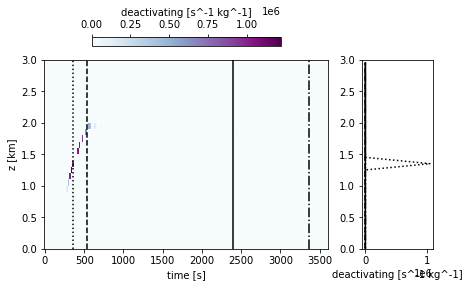

HTML(value="<a href='./figures_deactivating_rhow=3.0_p=True_b=True.pdf' target='_blank'>./figures_deactivating…

In [23]:
line={6: ':', 9: '--', 40: '-', 56: '-.'}
plot1D(var='deactivating', qlabel='deactivating [s^-1 kg^-1]', fname=f'figures_deactivating_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line, cmax=1.25e6)

### Collision rates

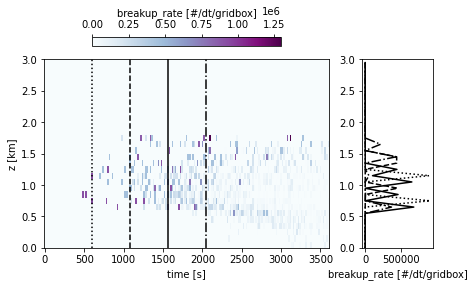

HTML(value="<a href='./figures_breakup_rate=3_p=True__b=True_.pdf' target='_blank'>./figures_breakup_rate=3_p=…

In [24]:
key = f"rhow={rho_times_w}_p={precip}_b={breakup}"
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='breakup_rate', qlabel='breakup_rate [#/dt/gridbox]', fname=f'figures_breakup_rate={int(rho_times_w)}_p={precip}__b={breakup}_'+other_label+'.pdf', 
    output=output[key],vmin=0.0,vmax=20.0,line=line,cmax=8e5)

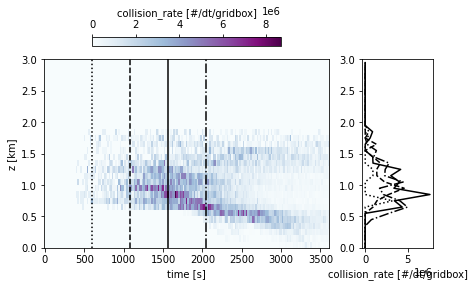

HTML(value="<a href='./figures_collision_rate=3_p=True__b=True_.pdf' target='_blank'>./figures_collision_rate=…

In [25]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='collision_rate', qlabel='collision_rate [#/dt/gridbox]', fname=f'figures_collision_rate={int(rho_times_w)}_p={precip}__b={breakup}_'+other_label+'.pdf', 
    output=output[key],vmin=0.0,vmax=20.0,line=line,cmax=1e7)

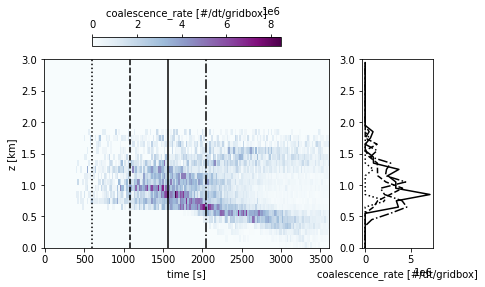

HTML(value="<a href='./figures_coalescence_rate=3_p=True__b=True_.pdf' target='_blank'>./figures_coalescence_r…

In [26]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='coalescence_rate', qlabel='coalescence_rate [#/dt/gridbox]', fname=f'figures_coalescence_rate={int(rho_times_w)}_p={precip}__b={breakup}_'+other_label+'.pdf', 
    output=output[key],vmin=0.0,vmax=20.0,line=line,cmax=1e7)

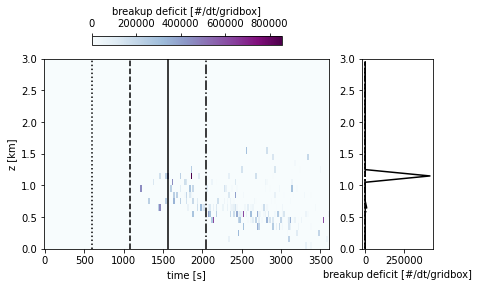

HTML(value="<a href='./figures_breakup_deficit=3_p=True__b=True_.pdf' target='_blank'>./figures_breakup_defici…

In [27]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='breakup_deficit', qlabel='breakup deficit [#/dt/gridbox]', fname=f'figures_breakup_deficit={int(rho_times_w)}_p={precip}__b={breakup}_'+other_label+'.pdf', 
    output=output[key],vmin=0.0,vmax=20.0,line=line)

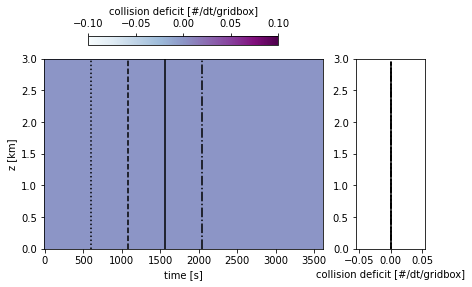

HTML(value="<a href='./figures_collision_deficit=3_p=True__b=True_.pdf' target='_blank'>./figures_collision_de…

In [28]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='collision_deficit', qlabel='collision deficit [#/dt/gridbox]', fname=f'figures_collision_deficit={int(rho_times_w)}_p={precip}__b={breakup}_'+other_label+'.pdf', 
    output=output[key],vmin=0.0,vmax=20.0,line=line)

## Fully Stochastic Straub 2010

In [29]:
# WITH BREAKUP
n_sd_per_gridbox = 256
dt = 20*si.s
dz = 100*si.m

frag_scale_r = 30*si.um
frag_scale_v = frag_scale_r**3*4/3*np.pi

rho_times_w = 3*si.m/si.s
precip = True
breakup = True
stochastic = True
key = f"rhow={rho_times_w}_p={precip}_b={breakup}_s={stochastic}"
settings = Settings1D(n_sd_per_gridbox=n_sd_per_gridbox, rho_times_w_1=rho_times_w, 
    dt=dt, dz=dz, precip=precip, breakup=breakup, stochastic_breakup=stochastic)
settings.warn_breakup_overflow=False
other_label= ""
output[key] = Simulation1D(settings).run().products


### Hydrometeors

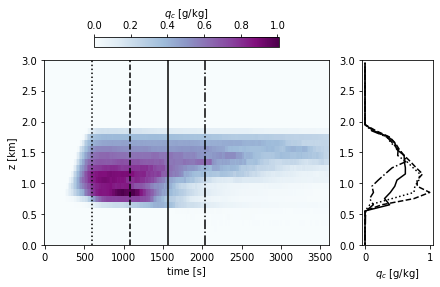

HTML(value="<a href='./figures_qc_rhow=3.0_p=True_b=True_s=True.pdf' target='_blank'>./figures_qc_rhow=3.0_p=T…

In [30]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='qc', qlabel='$q_c$ [g/kg]', fname=f'figures_qc_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line,cmax=1.25)

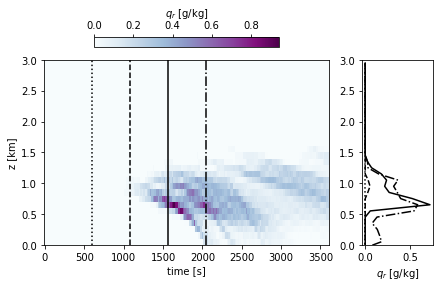

HTML(value="<a href='./figures_qr_rhow=3.0_p=True_b=True_s=True.pdf' target='_blank'>./figures_qr_rhow=3.0_p=T…

In [31]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='qr', qlabel='$q_r$ [g/kg]', fname=f'figures_qr_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line,cmax=1.25)

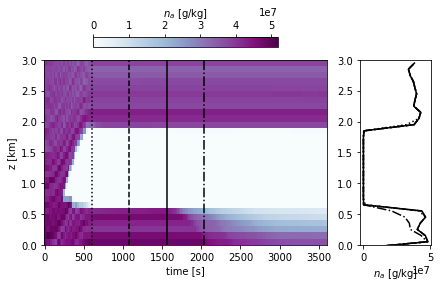

HTML(value="<a href='./figures_na_rhow=3.0_p=True_b=True_s=True.pdf' target='_blank'>./figures_na_rhow=3.0_p=T…

In [32]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='na', qlabel='$n_a$ [g/kg]', fname=f'figures_na_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line,cmax=75)

### Aerosol Rates

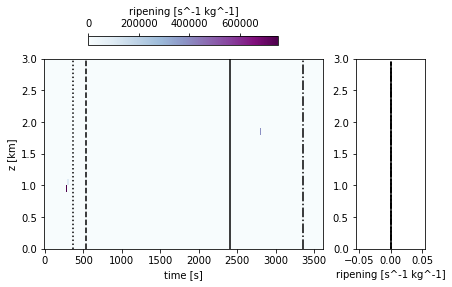

HTML(value="<a href='./figures_ripening_rhow=3.0_p=True_b=True_s=True.pdf' target='_blank'>./figures_ripening_…

In [33]:
line={6: ':', 9: '--', 40: '-', 56: '-.'}
plot1D(var='ripening', qlabel='ripening [s^-1 kg^-1]', fname=f'figures_ripening_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line, cmax=5e5)

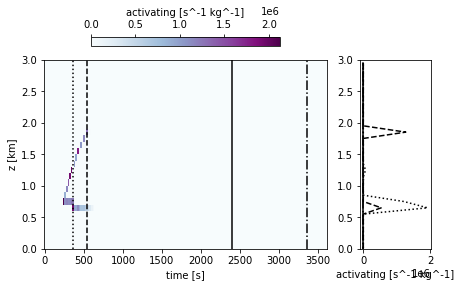

HTML(value="<a href='./figures_activating_rhow=3.0_p=True_b=True_s=True.pdf' target='_blank'>./figures_activat…

In [34]:
line={6: ':', 9: '--', 40: '-', 56: '-.'}
plot1D(var='activating', qlabel='activating [s^-1 kg^-1]', fname=f'figures_activating_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line, cmax=2e6)

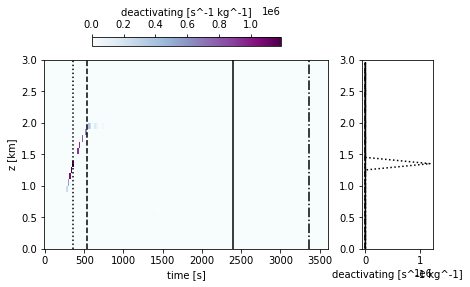

HTML(value="<a href='./figures_deactivating_rhow=3.0_p=True_b=True_s=True.pdf' target='_blank'>./figures_deact…

In [35]:
line={6: ':', 9: '--', 40: '-', 56: '-.'}
plot1D(var='deactivating', qlabel='deactivating [s^-1 kg^-1]', fname=f'figures_deactivating_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=1.0,line=line, cmax=1.25e6)

### Collision Rates

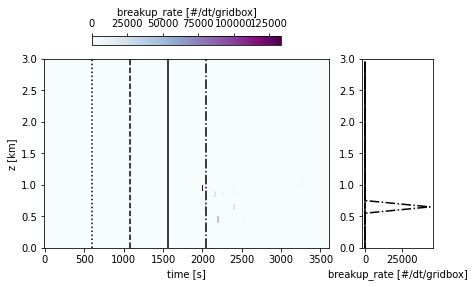

HTML(value="<a href='./figures_breakup_rate_rhow=3.0_p=True_b=True_s=True.pdf' target='_blank'>./figures_break…

In [36]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='breakup_rate', qlabel='breakup_rate [#/dt/gridbox]', fname=f'figures_breakup_rate_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=20.0,line=line)

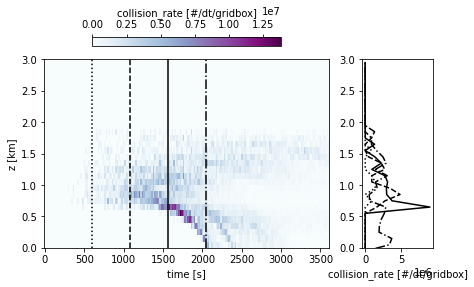

HTML(value="<a href='./figures_collision_rate_rhow=3.0_p=True_b=True_s=True.pdf' target='_blank'>./figures_col…

In [37]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='collision_rate', qlabel='collision_rate [#/dt/gridbox]', fname=f'figures_collision_rate_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=20.0,line=line,cmax=1e7)

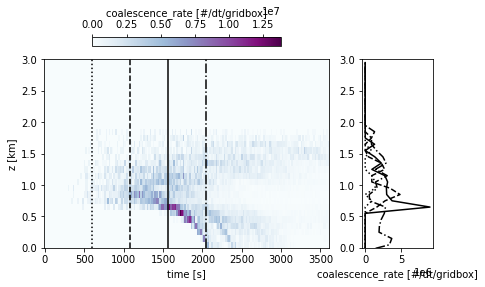

HTML(value="<a href='./figures_coalescence_rate_rhow=3.0_p=True_b=True_s=True.pdf' target='_blank'>./figures_c…

In [38]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='coalescence_rate', qlabel='coalescence_rate [#/dt/gridbox]', fname=f'figures_coalescence_rate_{key}.pdf',
    output=output[key],vmin=0.0,vmax=20.0,line=line,cmax=1e7)

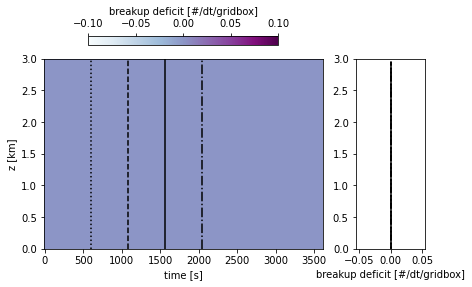

HTML(value="<a href='./figures_breakup_deficit_rhow=3.0_p=True_b=True_s=True.pdf' target='_blank'>./figures_br…

In [39]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='breakup_deficit', qlabel='breakup deficit [#/dt/gridbox]', fname=f'figures_breakup_deficit_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=20.0,line=line)

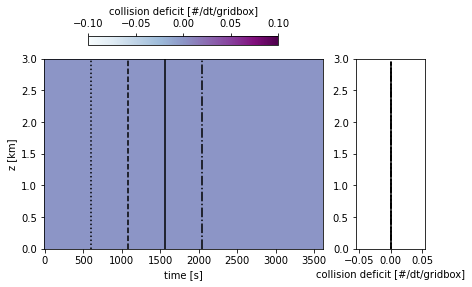

HTML(value="<a href='./figures_collision_deficit_rhow=3.0_p=True_b=True_s=True.pdf' target='_blank'>./figures_…

In [40]:
line={10: ':', 18: '--', 26: '-', 34: '-.'}
plot1D(var='collision_deficit', qlabel='collision deficit [#/dt/gridbox]', fname=f'figures_collision_deficit_{key}.pdf', 
    output=output[key],vmin=0.0,vmax=20.0,line=line)